# Final Project Econ 323

Canada's indigenous population is currently facing a water crisis. More than 100 First Nation communities have long term water boil advisories in place, meaning they are without access to clean drinking water. 

Many Canadian indigneous populations have faced these conditions for years, and some, for even decades. The average duration of a water boil advisory lasts eight years. In a water-rich country, indigenous nations are facing conditions similar to those in impoverished and developing countries. As a result of increasing pressure from indigenous and social justice organizations, in 2016, the Government of Canada committed to ending all long term drinking water advisories by 2021. 

In this project, I will be investigating how long term water boil advisories affect migration, education, and unemployment levels within indigenous nations in Canada. Using data from Statistics Canada and Indigenous Services Canada, I will be looking at long term water boil advisories for the period of 1996-2016. This project is based upon my existing thesis in Econ 494. 

### Initial Cleaning of Data
I take a data set in which I have merged individual census data for each affected Indigenous nation (which was previously merged within Python) and clean it further.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm


import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn import linear_model

In [3]:
Demo_data = pd.read_excel(r'master_data_2016_copy.xlsx')
demo_df = pd.DataFrame(Demo_data)
demo_df.head()

#dropping columns
demo_df.drop(["  Married spouses and common-law partners", "  Lone parents"], axis = 1, inplace = True)
demo_df.drop(["Number of Years Advisory was On "], axis=1, inplace = True)

#cleaning column names 
demo_df.rename(columns={"Year":"year", "First Nation":"first_nation", "Population": "population"}, inplace = True)
demo_df.rename(columns={"Total - Marital Status 15 years and over":"total_married"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population with an Aboriginal language as mother tongue":"aboriginal_mother_tongue"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population who speak an Aboriginal language most often at home":"aboriginal_home_language"}, inplace = True)
demo_df.rename(columns={"  Children in census families":"children"}, inplace = True)
demo_df.rename(columns={"  Married or living common law":"married_commonlaw","  Not married and not living common law":"notmarried_commonlaw"}, inplace = True)
demo_df.rename(columns={"Total - Family Characteristics":"total_family","  Persons not in census families":"not_in_family"}, inplace = True)
demo_df.rename(columns={"Total - Mobility status 1 year ago ":"total_mobility_1yr", "Total - Mobility status 5 years ago":"total_mobility_5yr"}, inplace = True)
demo_df.rename(columns={"  Non-movers":"non-movers_1yr","  Movers":"movers_1yr","  Non-movers.1":"non-movers_5yr","  Movers.1":"movers_5yr"}, inplace = True)
demo_df.rename(columns={"Total - Highest certificate, diploma or degree ":"total_hs_higher_edu","  No certificate, diploma or degree":"no_hs_higheredu","  Secondary (high) school diploma or equivalency certificate":"hs_edu"}, inplace = True)
demo_df.rename(columns={"   Persons with a trades; college or university certificate or diploma (below bachelor's degree)":"higher_edu_below"}, inplace = True)
demo_df.rename(columns={"  University certificate, diploma or degree at bachelor level or above":"higher_edu_bach"}, inplace = True)
demo_df.rename(columns={"Total - Labour force status ": "total_lbr","  In the labour force":"in_lbr_force","    Employed":"employed","    Unemployed":"unemployed","  Not in the labour force":"not_in_lbr_force"},inplace = True)
demo_df.rename(columns={"Participation rate":"participation_rate", "Employment rate":"employment_rate","Unemployment rate":"unemployment_rate","Multiple On":"multiple_on","Advisory On":"advisory_on"}, inplace = True)

#converting all relevant columns into percentages represented in decimal format
demo_df["employment_rate"] = demo_df["employment_rate"].div(100)
demo_df["unemployment_rate"] = demo_df["unemployment_rate"].div(100)
demo_df["participation_rate"] = demo_df["participation_rate"].div(100)
demo_df["married"] = demo_df["married_commonlaw"]/demo_df["total_married"]
demo_df["child_perc"] = demo_df["children"]/demo_df["total_family"]
demo_df["single_perc"] = demo_df["not_in_family"]/demo_df["total_family"]
demo_df["movers_1yr_perc"] = demo_df["movers_1yr"]/demo_df["total_mobility_1yr"]
demo_df["movers_5yr_perc"] = demo_df["movers_5yr"]/demo_df["total_mobility_5yr"]

#generating new column for hs and uni education
demo_df["high_school_more"] = demo_df["hs_edu"] + demo_df["higher_edu_bach"]+ demo_df["higher_edu_below"]
demo_df["high_school_more"] = demo_df["high_school_more"]/demo_df["total_hs_higher_edu"]

#filling Nan with 0's
demo_df = demo_df.fillna(0)


#preview of cleaned data  
demo_df.head()




,year,first_nation,population,total_married,married_commonlaw,notmarried_commonlaw,total_family,children,not_in_family,aboriginal_mother_tongue,...,employment_rate,unemployment_rate,multiple_on,advisory_on,married,child_perc,single_perc,movers_1yr_perc,movers_5yr_perc,high_school_more
0,1996,Shoal Lake No.40,164,100.0,35.0,70.0,40.0,30.0,0.0,0.666667,...,0.450,0.167,0,0,0.350000,0.750000,0.0,0.0,0.0,0.0
1,1996,North Spirit Lake,157,110.0,35.0,75.0,35.0,25.0,0.0,0.750000,...,0.478,0.231,0,0,0.318182,0.714286,0.0,0.0,0.0,0.0
2,1996,Sandy Lake,1611,950.0,450.0,500.0,355.0,290.0,0.0,0.618012,...,0.416,0.186,0,0,0.473684,0.816901,0.0,0.0,0.0,0.0
3,1996,Toosey,75,55.0,0.0,50.0,15.0,10.0,0.0,0.133333,...,0.500,0.250,0,0,0.000000,0.666667,0.0,0.0,0.0,0.0
4,1996,Indian Island,52,30.0,5.0,25.0,15.0,0.0,0.0,0.272727,...,0.333,0.500,0,0,0.166667,0.000000,0.0,0.0,0.0,0.0


### Preliminary Graphs of the Data

Here I prepare some visualizations to better understand the data I have cleaned. These graphs are meant to give some preliminary observations on the composition of the data before regressions are run. 

For an initial visualization of the data, here I am going to look at the number of advisories over my time frame, 1996-2016. Since demographic data is only available for each census year in this time frame, I coded the occurance of an advisory for a census year if an advisory was on within the last five years of the relevant census year.

In [4]:
#number of advisories by year

year = demo_df.groupby("year")
year.head()
df_1996 = year.get_group(1996)
#print (pd.value_counts(df_1996['advisory_on'].values, sort=False))

df_2001 = year.get_group(2001)
#print (pd.value_counts(df_2001['advisory_on'].values, sort=False))

df_2006 = year.get_group(2006)
#print(pd.value_counts(df_2006["advisory_on"].values, sort=False))

df_2011 = year.get_group(2011)
#print(pd.value_counts(df_2011["advisory_on"].values, sort=False))

df_2016 = year.get_group(2016)
#print(pd.value_counts(df_2016["advisory_on"].values, sort=False))

info = {"year":[1996, 2001, 2006, 2011, 2016], "Advisory On":[0,0,12,26,66],"Advisory Off":[46,58,80,47,27]}
year_df = pd.DataFrame(data=info)
year_df.columns

Index(['year', 'Advisory On', 'Advisory Off'], dtype='object')

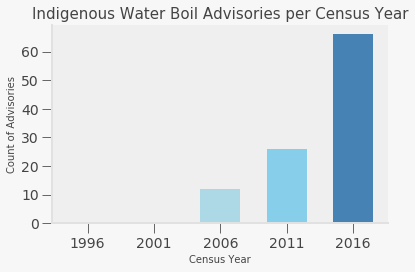

<Figure size 1440x720 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt

y = year_df["year"]
x = year_df['Advisory On']
plt.bar(y,x, width = 3, color = ["white","white","lightblue","skyblue","steelblue"])
plt.xticks(y)
plt.grid(None)
plt.title("Indigenous Water Boil Advisories per Census Year", fontsize = 15)
plt.xlabel("Census Year", fontsize = 10)
plt.ylabel("Count of Advisories", fontsize = 10)
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.savefig("boil_advisories_4.png")
#plt.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()

As we can see from the graph above, the number of advisories is increasing per year, with no advisories occuring in 1996 and 2001. Due to limitations of data, within my dataset, the number of advisories in 1996 and 2001 is zero, however in reality this is not the case. The reason there could be "missing advisories" is due to the fact that demographic data for the affected First Nation was not available for the relevant census year, therefore, the First Nation could not be marked as having an advisory. Note that the count of advisories means the number of First Nation communities that have water boil advisories within 5 years of the relevant census year. 

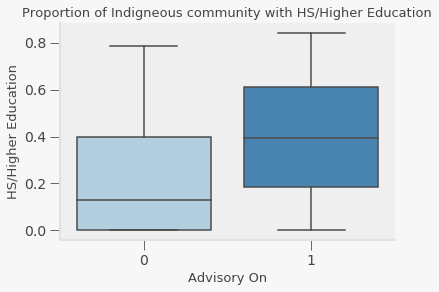

In [6]:
#boxpot of HS/Higher Education
import seaborn as sns

edu_boxplot = sns.boxplot(x="advisory_on", y="high_school_more", data=demo_df, palette = "Blues")
edu_boxplot.set_xlabel("Advisory On", fontsize = 13)
edu_boxplot.set_ylabel("HS/Higher Education", fontsize = 13)
edu_boxplot.set_title("Proportion of Indigneous community with HS/Higher Education", fontsize= 13)
edu_boxplot.grid(False)

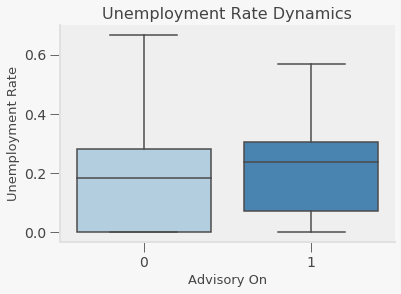

In [7]:
#boxplot of unemployment rate
unemp_boxplot = sns.boxplot(x="advisory_on", y="unemployment_rate", data=demo_df, palette = "Blues")
unemp_boxplot.set_xlabel("Advisory On", fontsize = 13)
unemp_boxplot.set_ylabel("Unemployment Rate", fontsize = 13)
unemp_boxplot.set_title("Unemployment Rate Dynamics", fontsize=16)
unemp_boxplot.grid(False)
#unemp_boxplot.legend(handles = unemp_boxplot, labels = ["Advisory Off", "Advisory On"])


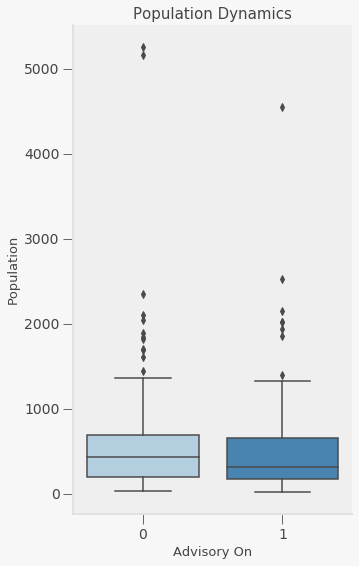

In [8]:
#boxplot of migration (population)

plt.figure(figsize=(5,9))
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df, palette = "Blues")
pop_boxplot.set_xlabel("Advisory On", fontsize = "13")
pop_boxplot.set_ylabel("Population", fontsize = "13")
pop_boxplot.set_title("Population Dynamics", fontsize = 15)
pop_boxplot.grid(False)

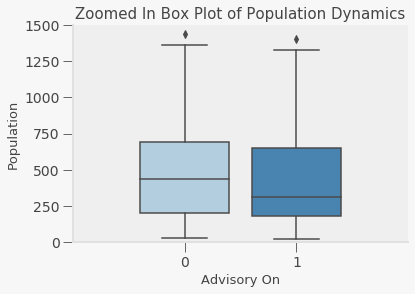

In [9]:
#zooming in 
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df, palette = "Blues")
pop_boxplot.set_xlabel("Advisory On", fontsize = 13)
pop_boxplot.set_ylabel("Population", fontsize = 13)
pop_boxplot.set_title("Zoomed In Box Plot of Population Dynamics", fontsize =15 )
plt.axis([-1,2,0,1500])
pop_boxplot.grid(False)

From the graphs, we see that when an advisory is turned on, the mean of the unemployment rate and attainment of a highschool/higher level education is higher than when an adivsory is off or not in place. For population (migration change) we see that it is slightly lower when an advisory is in effect.

## Interactive Map of Indigenous Water Boil Advisories in Canada

To get a better idea of how long term water boil advisories are distributed across Canada, I'm going to make a map of the individual First Nation communities that are affected. First, I'll make my dataset of coordinates so I will be ready to put the point on the map. I created this dataset by searching up affected First Nation community names, and obtained coordinates from the GeoHacks website from Wikipedia, or from Google Maps. 

Using folium, I create a map of Canada with interactive points with the names of affected First Nation communities. Click to take a look at the names!

In [10]:
import folium
map_1 = folium.Map(location=[55.585901, -105.750596], zoom_start = 5)
map_data = pd.read_excel(r'map data 2.0.xlsx')
map_df_1 = pd.DataFrame(map_data)
map_df_1["Coordinates"] = list(zip(map_df_1["Longitude"], map_df_1["Latitude"]))
map_df_1.head()
map_df_1['Latitude'] = map_df_1['Latitude'].astype(float)
map_df_1["Longitude"] = map_df_1["Longitude"].astype(float)

for i in range(0,len(map_df_1)):
    folium.Marker([map_df_1.iloc[i]['Latitude'], map_df_1.iloc[i]['Longitude']], popup=map_df_1.iloc[i]['First Nation']).add_to(map_1)

map_1

As we can see from the graph above, the provinces that are most affected by long term water boil advisories are Manitoba and Ontario. However, water boil advisories seem to plague the majority of Canada, with exception to the North West Territories, Nunavat, and the Yukon. 

### Fixed Effects Regression

Here, I will be looking at a simple fixed effects panel OLS regression for the outcomes of long term water boil advisories on migration, educational attainment, and unemployment rates. 

#### Regression on Migration (as observed through Population change)
For the regression on migration, I will run one (First Nation community and year) fixed effects regression without additional controls, and another with additional controls. These controls will control for noise in the estimate. 

In [11]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
demo_df.columns

#regression on population
lm_pop = list()
#no controls, fixed effects
lm_pop.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_pop.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year) + child_perc + movers_1yr_perc + movers_5yr_perc + high_school_more + aboriginal_mother_tongue + aboriginal_home_language", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors = ["Intercept","advisory_on", "child_perc", "movers_1yr_perc","movers_5yr_perc","high_school_more","aboriginal_mother_tongue","aboriginal_home_language"]
tble = summary_col(lm_pop,regressor_order=regressors, stars = True)
tble.tables[0] = tble.tables[0].loc[regressors]
print (tble)


                         population I population II
---------------------------------------------------
Intercept                139.6264***  196.9917***  
advisory_on              -20.4577     -15.7457     
child_perc                            -76.8143**   
movers_1yr_perc                       -224.3292    
movers_5yr_perc                       41.3787      
high_school_more                      -46.3176     
aboriginal_mother_tongue              3.2227***    
aboriginal_home_language              -2.5327**    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


With the results observed above, our estimates with and without controls are not significant. The effects of water boil advisory on population change are quite small, decreasing the population by around 20 people without controls, and around 15 in the estimate with controls. 

#### Regression on Educational Attainment (High School Certificate and/or Higher Education)

Like the regression on migration, I will run two fixed effect regressions controlling for variation that occurs First Nation community and years. One regression will run without additional controls, another will incorporate additional controls.

In [13]:
#regression on attainment of high school education and/or higher level education
lm_edu = list()
#no controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year) + child_perc + married", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors_1 = ["Intercept","advisory_on", "child_perc", "married"]
tble_1 = summary_col(lm_edu,regressor_order=regressors_1, stars = True)
tble_1.tables[0] = tble_1.tables[0].loc[regressors_1]
print (tble_1)


            high_school_more I high_school_more II
--------------------------------------------------
Intercept   0.0179             -0.2316**          
advisory_on 0.0218             -0.0019            
child_perc                     0.1647***          
married                        0.4152***          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Similar to our regression looking at migration through population change, our effects on high school and/or higher level attainment are insignificant. Without controls, it seems that the proportion of a indigneous community that would have achieved a high school diploma or higher would have actually increased by ~2%, and when I add controls, it would have decreased by less than 1%. 

#### Regression on Unemployment Rate

In [14]:
#regression on unemployment rate
lm_unemp = list()
#no controls, fixed effects
lm_unemp.append(smf.ols(formula="unemployment_rate ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_unemp.append(smf.ols(formula="unemployment_rate ~ advisory_on + C(first_nation) + C(year) + high_school_more + child_perc + married", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors_2 = ["Intercept","advisory_on", "child_perc", "married", "high_school_more"]
tble_2= summary_col(lm_unemp,regressor_order=regressors_2, stars = True)
tble_2.tables[0] = tble_2.tables[0].loc[regressors_2]
print (tble_2)


                 unemployment_rate I unemployment_rate II
---------------------------------------------------------
Intercept        0.2145***           0.1384***           
advisory_on      0.0021              -0.0171             
child_perc                           0.1971***           
married                              -0.1118             
high_school_more                     0.2742***           
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


The effects on unemployment rate are also found to be insignificant. For the regression without additional controls, the unemployment rate increases by less than 1%. For the regression with additional controls, it seems that the unemployment rate for an average indigneous community would actually decrease by around 2%. 

Throughout these three regressions, what I find is that there are no significant effects on migration, high school and/or higher level educational attainment, or unemployment levels. This means that when a long term water boil advisory is in effect, indigenous populations do not move out of their communities, their levels of educational attainment are unaffected, and unemployment rates are unaffected.

### Lasso Regression

I will implement a lasso regression as my regularization tool to look at which coefficients from my fixed effects regression could be eliminated due to overfitting. For each of my regressions looking at different outcomes, I will test out the different controls that are particular to each outcome variable and see how they perform under lasso regression. Instead of the fixed effects regression above, I will instead be implementing a simple linear regression, omitting time and First Nation community fixed effects. 

In [15]:
#lasso regression for controls pertaining to population

demo_df.columns
X_pop = demo_df.drop(["year", "higher_edu_bach", "total_lbr","in_lbr_force", "first_nation", "population", "total_married", "not_in_family", "married_commonlaw", "notmarried_commonlaw", "employed", "employment_rate", "single_perc", "total_family", "children","total_mobility_1yr","non-movers_1yr","movers_1yr","total_mobility_5yr","non-movers_5yr","movers_5yr","total_hs_higher_edu","no_hs_higheredu","hs_edu","higher_edu_below","unemployed","not_in_lbr_force","participation_rate","unemployment_rate","multiple_on","married"], axis=1).copy()
X_pop.head()
y_pop = demo_df["population"]

lasso_model_pop = linear_model.Lasso()
lasso_model_pop.fit(X_pop, y_pop)

lr_model_pop = linear_model.LinearRegression()
lr_model_pop.fit(X_pop, y_pop)

lasso_coefs_pop = pd.Series(dict(zip(list(X_pop), lasso_model_pop.coef_)))
lr_coefs_pop = pd.Series(dict(zip(list(X_pop), lr_model_pop.coef_)))
coefs_pop = pd.DataFrame(dict(lasso=lasso_coefs_pop, linreg=lr_coefs_pop))
coefs_pop

,lasso,linreg
aboriginal_mother_tongue,6.541572,6.144288
aboriginal_home_language,-1.897842,-1.187683
advisory_on,-9.126670,-22.827865
child_perc,346.293725,368.148840
movers_1yr_perc,-4.705196,-704.278714
movers_5yr_perc,-0.000000,105.654375
high_school_more,363.173397,449.845937


Here we see that most of the control variables used do not contribute to overfitting within the regression, this is very good news! The only variable that could cause an overfitting issue and should be eliminated from my regression is movers_5yr_perc.

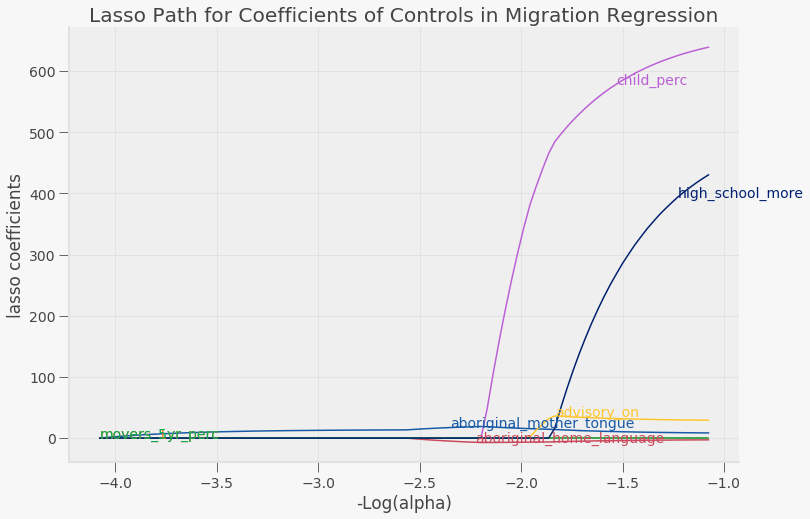

In [46]:
from itertools import cycle
#alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso_pop, _ = linear_model.lasso_path(X_pop, y_pop, alphas=None, fit_intercept=True, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = cycle(qeds.themes.COLOR_CYCLE)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso_pop, colors, list(X_pop)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path for Coefficients of Controls in Migration Regression')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)


In [45]:
#for regression on completion of high school and/or some or all higher level education
demo_df.columns
X_edu = demo_df.drop(["year","higher_edu_bach","total_lbr","in_lbr_force", "aboriginal_home_language","aboriginal_mother_tongue", "high_school_more","movers_1yr_perc","movers_5yr_perc", "first_nation", "population", "total_married", "not_in_family", "married_commonlaw", "notmarried_commonlaw", "employed", "employment_rate", "single_perc", "total_family", "children","total_mobility_1yr","non-movers_1yr","movers_1yr","total_mobility_5yr","non-movers_5yr","movers_5yr","total_hs_higher_edu","no_hs_higheredu","hs_edu","higher_edu_below","unemployed","not_in_lbr_force","participation_rate","unemployment_rate","multiple_on"], axis=1).copy()
X_edu.head()
y_edu = demo_df["high_school_more"]

lasso_model_edu = linear_model.Lasso()
lasso_model_edu.fit(X_edu, y_edu)

lr_model_edu = linear_model.LinearRegression()
lr_model_edu.fit(X_edu, y_edu)

lasso_coefs_edu = pd.Series(dict(zip(list(X_edu), lasso_model_pop.coef_)))
lr_coefs_edu = pd.Series(dict(zip(list(X_edu), lr_model_pop.coef_)))
coefs_edu = pd.DataFrame(dict(lasso=lasso_coefs_edu, linreg=lr_coefs_edu))
coefs_edu

,lasso,linreg
advisory_on,6.541572,6.144288
married,-1.897842,-1.187683
child_perc,-9.126670,-22.827865


It looks like from above, we don't have to eliminate any of our control variables! Let's also see a visualization below. 

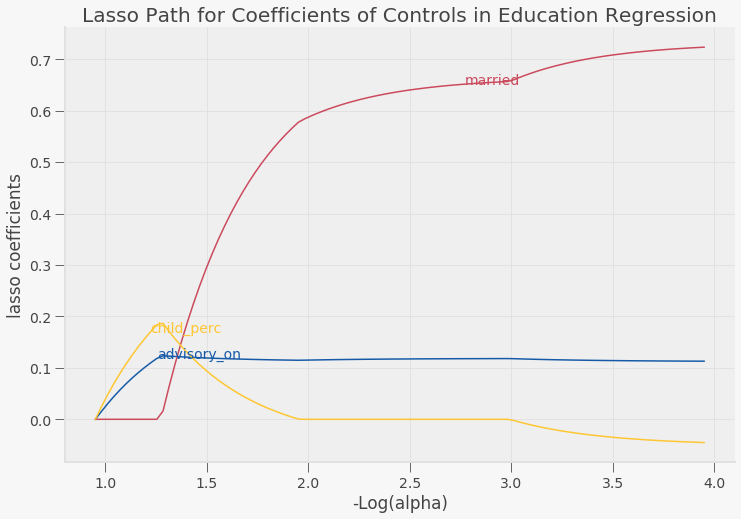

In [62]:
from itertools import cycle
#alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso_edu, _ = linear_model.lasso_path(X_edu, y_edu, alphas = None, fit_intercept=True, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = cycle(qeds.themes.COLOR_CYCLE)
log_alphas = -np.log10(alphas)
for coef_l_e, c, name in zip(coefs_lasso_edu, colors, list(X_edu)):
   ax.plot(log_alphas, coef_l_e, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path for Coefficients of Controls in Education Regression')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l_e))
   i = [idx for idx in range(len(coef_l_e)) if abs(coef_l_e[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l_e[i]
   ax.annotate(name, (xnote, ynote), color=c)

In [23]:
#for regression on unemployment rates
demo_df.columns
X_unemp = demo_df.drop(["year","higher_edu_bach","total_lbr","in_lbr_force", "aboriginal_home_language","aboriginal_mother_tongue","movers_1yr_perc","movers_5yr_perc", "first_nation", "population", "total_married", "not_in_family", "married_commonlaw", "notmarried_commonlaw", "employed", "employment_rate", "single_perc", "total_family", "children","total_mobility_1yr","non-movers_1yr","movers_1yr","total_mobility_5yr","non-movers_5yr","movers_5yr","total_hs_higher_edu","no_hs_higheredu","hs_edu","higher_edu_below","unemployed","not_in_lbr_force","participation_rate","unemployment_rate","multiple_on"], axis=1).copy()
X_unemp.head()
y_unemp = demo_df["unemployment_rate"]

lasso_model_unemp = linear_model.Lasso()
lasso_model_unemp.fit(X_unemp, y_unemp)

lr_model_unemp = linear_model.LinearRegression()
lr_model_unemp.fit(X_unemp, y_unemp)

lasso_coefs_unemp = pd.Series(dict(zip(list(X_unemp), lasso_model_unemp.coef_)))
lr_coefs_unemp = pd.Series(dict(zip(list(X_unemp), lr_model_unemp.coef_)))
coefs_unemp = pd.DataFrame(dict(lasso=lasso_coefs_unemp, linreg=lr_coefs_unemp))
coefs_unemp

,lasso,linreg
advisory_on,0.0,0.001543
married,0.0,-0.137155
child_perc,0.0,0.348416
high_school_more,0.0,0.232869


This is surprising - all of the controls, including the treatment variable, contribute to overfitting within the regression! However, I can't chuck out the treatment variable, or else, I would have no regression. But, I can disinclude the other controls and just use fixed effects.

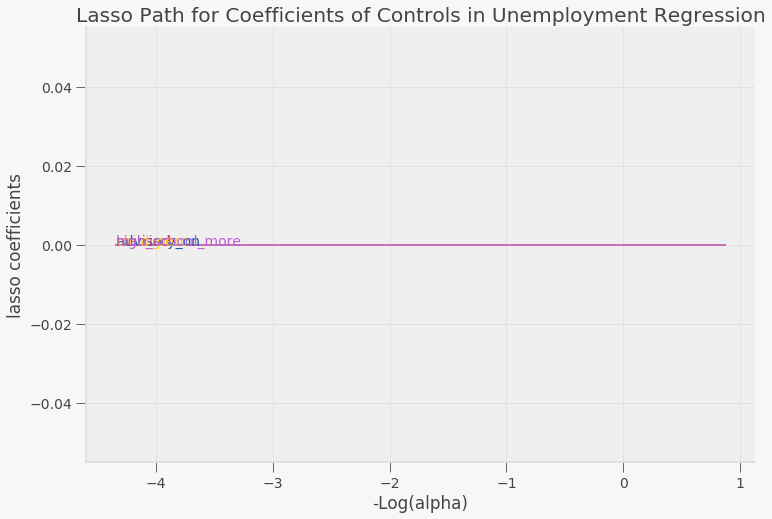

In [47]:
from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso_unemp, _ = linear_model.lasso_path(X_unemp, y_unemp, alphas = alphas, fit_intercept=True, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = cycle(qeds.themes.COLOR_CYCLE)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso_unemp, colors, list(X_unemp)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path for Coefficients of Controls in Unemployment Regression')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)

### Regressions with Lasso Considerations

#### Revised Regression on Migration

In [200]:
#regression on population
lm_pop_1 = list()
#no controls, fixed effects
lm_pop_1.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#old controls before lasso regression, fixed effects 
lm_pop_1.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year) + child_perc + movers_1yr_perc + movers_5yr_perc + high_school_more + aboriginal_mother_tongue + aboriginal_home_language", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

#new regression with considerations from the lasso regression, fixed effects
lm_pop_1.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year) + child_perc + movers_1yr_perc + high_school_more + aboriginal_mother_tongue + aboriginal_home_language", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors_pop_1 = ["Intercept","advisory_on", "child_perc", "movers_1yr_perc","movers_5yr_perc","high_school_more","aboriginal_mother_tongue","aboriginal_home_language"]
table_pop_1 = summary_col(lm_pop_1,regressor_order=regressors_pop_1, stars = True)
table_pop_1.tables[0] = table_pop_1.tables[0].loc[regressors_pop_1]
print (table_pop_1)



                         population I population II population III
------------------------------------------------------------------
Intercept                139.6264***  196.9917***   197.1705***   
advisory_on              -20.4577     -15.7457      -16.5453      
child_perc                            -76.8143**    -77.1064**    
movers_1yr_perc                       -224.3292     -167.4374     
movers_5yr_perc                       41.3787                     
high_school_more                      -46.3176      -39.0160      
aboriginal_mother_tongue              3.2227***     3.2881***     
aboriginal_home_language              -2.5327**     -2.5524**     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


By eliminating the control that looked at the proportion of people who moved within the last five years, our estimate when the advisory is turned on slightly decreases to 16, as seen in the population III column. This estimate says that when an advisory is turned on, more people migrate out of their community than previously seen with the population II regression. It is important to note that all three estimates are still not signficant.

#### Revised Regression on Education

From the lasso regression, I found out that all of the control variables I introduced didn't contribute to overfitting! Here are the results of the original regression, with and without additional controls below.

In [21]:
#regression on attainment of high school education and/or higher level education
lm_edu = list()
#no controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year) + child_perc + married", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors_1 = ["Intercept","advisory_on", "child_perc", "married"]
tble_1 = summary_col(lm_edu,regressor_order=regressors_1, stars = True)
tble_1.tables[0] = tble_1.tables[0].loc[regressors_1]
print (tble_1)


            high_school_more I high_school_more II
--------------------------------------------------
Intercept   0.0179             -0.2316**          
advisory_on 0.0218             -0.0019            
child_perc                     0.1647***          
married                        0.4152***          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Since the additional control variables don't contribute to overfitting, they might give a more accurate estimate than high_school_more I, which only controls for fixed effects. In high_school_more II I see find that when there is a long term water boil advisory in place for an indigenous community, the proportion of people within the community who attain a high school education and or higher education decreases by ~ 0.2%, although this effect is not significant.

#### Revised Regression on Unemployment Rates

In [29]:
#regression on unemployment rate
lm_unemp = list()
#no controls, fixed effects
lm_unemp.append(smf.ols(formula="unemployment_rate ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))

regressors_2 = ["Intercept","advisory_on"]
tble_2= summary_col(lm_unemp,regressor_order=regressors_2, stars = True)
tble_2.tables[0] = tble_2.tables[0].loc[regressors_2]
print (tble_2)


            unemployment_rate
-----------------------------
Intercept   0.2145***        
advisory_on 0.0021           
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


Since the lasso regression indicated that I was overfitting my model by incorporating my additonal controls, I only run one regression - one with fixed effects and no other controls. I see that the effect of a long term water boil advisory on unemployment rates is still not signficant, however, the impact is quite small at 0.2% increase.